Zadanie 2 (1 pkt)

Dokonaj klasyfikacji irysów siecią neuronową np. o strukturze:
1. Z trzema wyjściami. Sieć zwraca na wyjściu trzy liczby mniej więcej z zakresu
[0,1], największa z nich wskazuje na gatunek irysa.


2. Z jednym wyjściem. Sieć zwraca na wyjściu jedną liczbę y mniej więcej z zakresu
[0,2], jeśli jesteśmy blisko 0, to mamy irys setosa, blisko 1 – iris virginica, blisko 2
– iris versicolor.



Rozwiązanie może zawierać następujące kroki.

a) Znormalizuj kolumny liczbowe bazy danych irysów (wg wzoru (x-min(x))/(max(x)-
min(x))).

b) (ten krok wykonaj albo wg pomysłu 1, albo 2, opiszemy tutaj jak zrobić 2) 
Rozbij kolumnę z gatunkiem na kolumnę: setosa, versicolor, virginica. 
Łącznie będzie w bazie 8 kolumn, 4 numeryczne, 1 kategorialna (tekst) i 3 logiczne. 
W kolumnie setosa będą wartości 0 (dany irys nie jest setosą) i 1 (dany irys jest setosą).
Podobnie będą działały pozostałe kolumny z gatunkami.

c) Podziel zbiór irysów z punktu b) na iris.train, iris.test tak, jak robiliśmy to przy innych algorytmach klasyfikujących.

d) Stwórz i uruchom sensowny model sieci neuronowej na tej bazie danych
wykorzystując wybrane przez ciebie paczki.

e) Zewaluuj klasyfikator uruchamiając na zbiorze testowym. Jak powiązać trzy
kolumny logiczne z prawdziwymi gatunkami? Podaj macierz błędu i dokładność
klasyfikatora.


a) Znormalizuj kolumny liczbowe bazy danych irysów (wg wzoru (x-min(x))/(max(x)-min(x))).

In [292]:
data(iris)

In [293]:
normalize_minmaxscaling <- function(x){
    return((x- min(x)) /(max(x)-min(x)))
}

In [294]:
iris_normalized <- as.data.frame(lapply(iris[1:4], normalize_minmaxscaling))

In [295]:
iris_normalized$Species <- iris$Species

In [296]:
head(iris_normalized)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 0,22222222   0,6250000   0,06779661   0,04166667  setosa 
2 0,16666667   0,4166667   0,06779661   0,04166667  setosa 
3 0,11111111   0,5000000   0,05084746   0,04166667  setosa 
4 0,08333333   0,4583333   0,08474576   0,04166667  setosa 
5 0,19444444   0,6666667   0,06779661   0,04166667  setosa 
6 0,30555556   0,7916667   0,11864407   0,12500000  setosa



c) Podziel zbiór irysów z punktu b) na iris.train, iris.test tak, jak robiliśmy to przy innych algorytmach klasyfikujących.


In [297]:
#set.seed(1234) 

In [298]:
ind <- sample(2,nrow(iris_normalized), replace=TRUE, prob=c(0.7,0.3))

In [299]:
trainData <- iris_normalized[ind==1,]

In [300]:
testData <- iris_normalized[ind==2,]

In [301]:
head(trainData)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 0,22222222   0,6250000   0,06779661   0,04166667  setosa 
2 0,16666667   0,4166667   0,06779661   0,04166667  setosa 
3 0,11111111   0,5000000   0,05084746   0,04166667  setosa 
4 0,08333333   0,4583333   0,08474576   0,04166667  setosa 
5 0,19444444   0,6666667   0,06779661   0,04166667  setosa 
6 0,30555556   0,7916667   0,11864407   0,12500000  setosa


b) (ten krok wykonaj albo wg pomysłu 1, albo 2, opiszemy tutaj jak zrobić 2) <br>
Rozbij kolumnę z gatunkiem na kolumnę: setosa, versicolor, virginica. 
Łącznie będzie w bazie 8 kolumn, 4 numeryczne, 1 kategorialna (tekst) i 3 logiczne. <br>
W kolumnie setosa będą wartości 0 (dany irys nie jest setosą) i 1 (dany irys jest setosą).
Podobnie będą działały pozostałe kolumny z gatunkami. <br>


WYKONANO POMYSŁ 1; sformułowano kolumny logiczne w analogiczny sposób

In [302]:
trainData$setosa = trainData$Species == "setosa"
trainData$virginica = trainData$Species == "virginica"
trainData$versicolor = trainData$Species == "versicolor"

In [303]:
head(trainData)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species setosa virginica
1 0,22222222   0,6250000   0,06779661   0,04166667  setosa  TRUE   FALSE    
2 0,16666667   0,4166667   0,06779661   0,04166667  setosa  TRUE   FALSE    
3 0,11111111   0,5000000   0,05084746   0,04166667  setosa  TRUE   FALSE    
4 0,08333333   0,4583333   0,08474576   0,04166667  setosa  TRUE   FALSE    
5 0,19444444   0,6666667   0,06779661   0,04166667  setosa  TRUE   FALSE    
6 0,30555556   0,7916667   0,11864407   0,12500000  setosa  TRUE   FALSE    
  versicolor
1 FALSE     
2 FALSE     
3 FALSE     
4 FALSE     
5 FALSE     
6 FALSE

d) Stwórz i uruchom sensowny model sieci neuronowej na tej bazie danych
wykorzystując wybrane przez ciebie paczki.



In [304]:
install.packages("neuralnet")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [305]:
library(neuralnet)

In [306]:
network = neuralnet(setosa + virginica + versicolor ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, trainData, hidden=3  , linear.output = T)

In [307]:
network

$call
neuralnet(formula = setosa + virginica + versicolor ~ Sepal.Length + 
    Sepal.Width + Petal.Length + Petal.Width, data = trainData, 
    hidden = 3, linear.output = T)

$response
    setosa virginica versicolor
1     TRUE     FALSE      FALSE
2     TRUE     FALSE      FALSE
3     TRUE     FALSE      FALSE
4     TRUE     FALSE      FALSE
5     TRUE     FALSE      FALSE
6     TRUE     FALSE      FALSE
8     TRUE     FALSE      FALSE
9     TRUE     FALSE      FALSE
11    TRUE     FALSE      FALSE
13    TRUE     FALSE      FALSE
15    TRUE     FALSE      FALSE
18    TRUE     FALSE      FALSE
19    TRUE     FALSE      FALSE
20    TRUE     FALSE      FALSE
21    TRUE     FALSE      FALSE
22    TRUE     FALSE      FALSE
23    TRUE     FALSE      FALSE
25    TRUE     FALSE      FALSE
26    TRUE     FALSE      FALSE
27    TRUE     FALSE      FALSE
28    TRUE     FALSE      FALSE
29    TRUE     FALSE      FALSE
31    TRUE     FALSE      FALSE
33    TRUE     FALSE      FALSE
34    TRUE   

In [308]:
head(network$generalized.weights[[1]])

[,1]       [,2]       [,3]       [,4]       [,5]       [,6]        [,7]     
1 -11,285502 -24,376678   49,96174   45,31613   3,034777    6,555117 -13,43518
2   2,872101   6,203737  -12,71500  -11,53272  -5,061893  -10,933686  22,40937
3   5,006869  10,814835  -22,16578  -20,10473 -54,658400 -118,062117 241,97673
4   2,543663   5,494311  -11,26098  -10,21390  -3,970093   -8,575399  17,57589
5  -6,330052 -13,672908   28,02360   25,41787   2,420446    5,228162 -10,71549
6  32,463494  70,121132 -143,71826 -130,35485   5,390548   11,643582 -23,86435
  [,8]       [,9]       [,10]       [,11]     [,12]     
1 -12,185931   2,956183    6,385353 -13,08724 -11,870341
2  20,325670  -5,204655  -11,242053  23,04139  20,898923
3 219,476914 -81,661994 -176,389865 361,52361 327,907922
4  15,941626  -4,057100   -8,763334  17,96108  16,290996
5  -9,719129   2,365562    5,109613 -10,47252  -9,498747
6 -21,645363   5,181832   11,192753 -22,94035 -20,807275

In [309]:
network$act.fct
network$err.fct

function (x) 
{
    1/(1 + exp(-x))
}
<bytecode: 0x55c7daa22238>
<environment: 0x55c7dad281c8>
attr(,"type")
[1] "logistic"

function (x, y) 
{
    1/2 * (y - x)^2
}
<bytecode: 0x55c7daa26ac0>
<environment: 0x55c7dad28778>
attr(,"type")
[1] "sse"

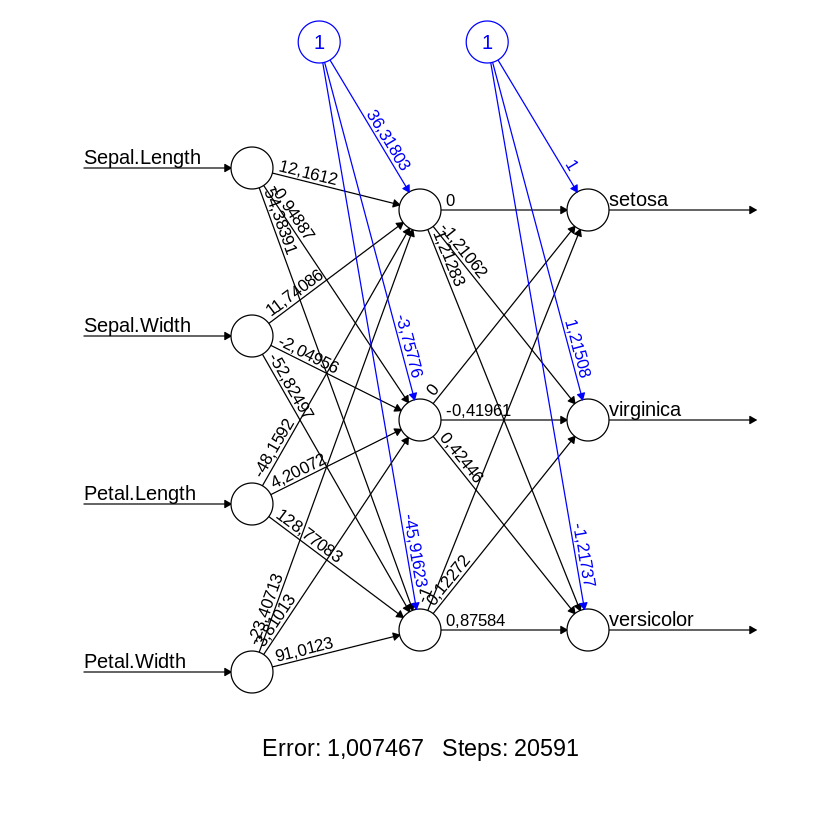

In [310]:
# UWAGA: Komenda plot(network) nie realizuje rysowania; konieczne jest wprowadzenie parametru rep="best" poniżej aby uzyskać rysowanie do postaci grafu
plot(network, rep="best")

In [311]:
install.packages("NeuralNetTools")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [312]:
library(NeuralNetTools)
plotnet(network)

### Ewaluacja - dokładność na zbiorze treningowym - wstępnie
e) Zewaluuj klasyfikator uruchamiając na zbiorze testowym. Jak powiązać trzy
kolumny logiczne z prawdziwymi gatunkami? Podaj macierz błędu i dokładność
klasyfikatora.

In [313]:
predict_NN = compute(network, trainData[, 1:4])

In [314]:
predict_NN_result = predict_NN$net.result

In [315]:
head(predict_NN_result)

[,1] [,2]          [,3]         
1 1     1,056988e-03 -1,095269e-03
2 1    -1,011561e-03  9,971843e-04
3 1    -7,794816e-05  5,278245e-05
4 1    -1,373290e-03  1,363094e-03
5 1     1,250687e-03 -1,291207e-03
6 1     6,630310e-04 -6,967595e-04

In [316]:
# Ewaluacja - dokładność na zbiorze treningowym
original_values <- max.col(trainData[, 6:8])
predicted_NN_max_columns <- max.col(predict_NN_result)

print(paste("Dokładność modelu dla danych treningowych 70% : ", round(mean(predicted_NN_max_columns  == original_values)*100, 2), "%. ¯ヽ(ツ)/¯ ", sep = " "))

# macierz błędu
table(predicted_NN_max_columns , original_values)



[1] "Dokładność modelu dla danych treningowych 70% :  99,1 %. ¯ヽ(ツ)/¯ "


                        original_values
predicted_NN_max_columns  1  2  3
                       1 37  0  0
                       2  0 38  1
                       3  0  0 35

UWAGA <br>
Przy tak sformułowanej sieci neuronowej tj.:
3 węzły jednej wartwy ukrytej, multivariable output (3 wyjścia) oraz wzięciu 70% jako dane treningowe <br>
przy parametrach modelu sieci zapisanych w tej kolejności: # network = neuralnet(setosa + virginica + versicolor <br>
oraz tej kolejności kolumn logicznych: setosa, virginica i versicolor  <br> 
dokładność na ZBIORZE TRENINGOWYM wynosi ~ 98,21 do całych 100 % <br>


NATOMIAST <br>
przy parametrach zapisanych w tej kolejności: # network = neuralnet( versicolor+ virginica + setosa <br>
dokładność modelu wynosi około 30% (sic!) <br>

BARDZO WAŻNA JEST KOLEJNOŚĆ ZAPISU w modelu i kolumn logicznych dla paczki R neuralnet

In [317]:
dataframe <- data.frame(original_values, predicted_NN_max_columns)
dataframe

original_values predicted_NN_max_columns
1   1               1                       
2   1               1                       
3   1               1                       
4   1               1                       
5   1               1                       
6   1               1                       
7   1               1                       
8   1               1                       
9   1               1                       
10  1               1                       
11  1               1                       
12  1               1                       
13  1               1                       
14  1               1                       
15  1               1                       
16  1               1                       
17  1               1                       
18  1               1                       
19  1               1                       
20  1               1                       
21  1               1                       
22  1               1                       
23  1               1                       
24  1               1                       
25  1               1                       
26  1               1                       
27  1               1                       
28  1               1                       
29  1               1                       
30  1               1                       
... ...             ...                     
82  2               2                       
83  2               2                       
84  2               2                       
85  2               2                       
86  2               2                       
87  2               2                       
88  2               2                       
89  2               2                       
90  2               2                       
91  2               2                       
92  2               2                       
93  2               2                       
94  2               2                       
95  2               2                       
96  2               2                       
97  2               2                       
98  2               2                       
99  2               2                       
100 2               2                       
101 2               2                       
102 2               2                       
103 2               2                       
104 2               2                       
105 2               2                       
106 2               2                       
107 2               2                       
108 2               2                       
109 2               2                       
110 2               2                       
111 2               2

### Ewaluacja - dokładność na zbiorze testowym
e) Zewaluuj klasyfikator uruchamiając na zbiorze testowym. Jak powiązać trzy
kolumny logiczne z prawdziwymi gatunkami? Podaj macierz błędu i dokładność
klasyfikatora.

In [318]:

testData$setosa = testData$Species == "setosa"
testData$virginica = testData$Species == "virginica"
testData$versicolor = testData$Species == "versicolor"

predict_NN_test = compute(network, testData[, 1:4])
predict_NN_test_result = predict_NN_test$net.result

original_values_test <- max.col(testData[, 6:8])
predicted_NN_test_max_columns <- max.col(predict_NN_test_result)

print(paste("Dokładność modelu dla danych testowych 70% : ", round(mean(predicted_NN_test_max_columns  == original_values_test)*100, 2), "%. ¯ヽ(ツ)/¯ ", sep = " "))

# macierz błędu
table(predicted_NN_test_max_columns , original_values_test)

dataframe <- data.frame(original_values_test, predicted_NN_test_max_columns)
dataframe

[1] "Dokładność modelu dla danych testowych 70% :  97,44 %. ¯ヽ(ツ)/¯ "


                             original_values_test
predicted_NN_test_max_columns  1  2  3
                            1 13  0  0
                            2  0 12  1
                            3  0  0 13

original_values_test predicted_NN_test_max_columns
1  1                    1                            
2  1                    1                            
3  1                    1                            
4  1                    1                            
5  1                    1                            
6  1                    1                            
7  1                    1                            
8  1                    1                            
9  1                    1                            
10 1                    1                            
11 1                    1                            
12 1                    1                            
13 1                    1                            
14 3                    3                            
15 3                    3                            
16 3                    3                            
17 3                    3                            
18 3                    3                            
19 3                    3                            
20 3                    3                            
21 3                    3                            
22 3                    3                            
23 3                    3                            
24 3                    2                            
25 3                    3                            
26 3                    3                            
27 3                    3                            
28 2                    2                            
29 2                    2                            
30 2                    2                            
31 2                    2                            
32 2                    2                            
33 2                    2                            
34 2                    2                            
35 2                    2                            
36 2                    2                            
37 2                    2                            
38 2                    2                            
39 2                    2

In [319]:
#predict_testNN_weights = predict_NN$net.result

#idx <- apply(predict_NN_weights, 1, which.max)
#prediction <- c('setosa', 'versicolor', 'virginica')[idx]

#prediction

# Wyświetlenie macierzy błędu - Confusion matrix
#table(prediction, trainData$Species)

In [320]:
# Błąd wyrażony w procentach
#mean(prediction != testData$Species) * 100

In [321]:
#testData$Species


In [322]:
#plot(testData, predict_testNN_weights)

Wypisanie cech sieci:
4 wejścia sieci: sepal.length sepal.width petal.length petal.width 
4 węzły ukryte
3 węzły wyjściowe (output to liczba od 0 do 1) <br>
największy z nich wskazuje na gatunek irysa